In [2]:
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

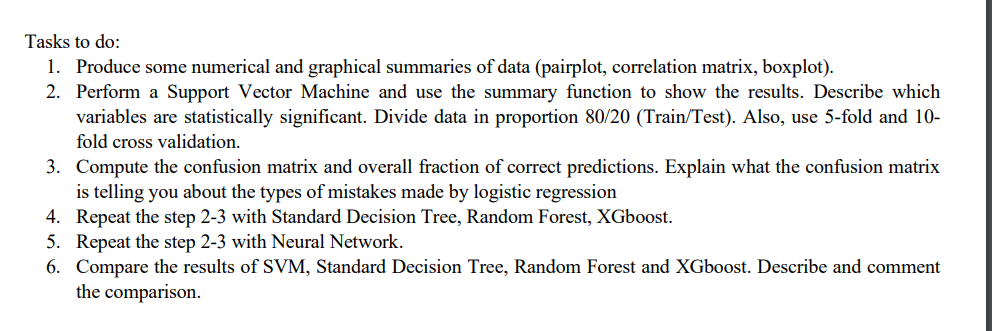

# 1. Produce some numerical and graphical summaries of data (pairplot, correlation matrix, boxplot).


In [6]:
df=pd.read_csv('Weekly.csv')
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [3]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


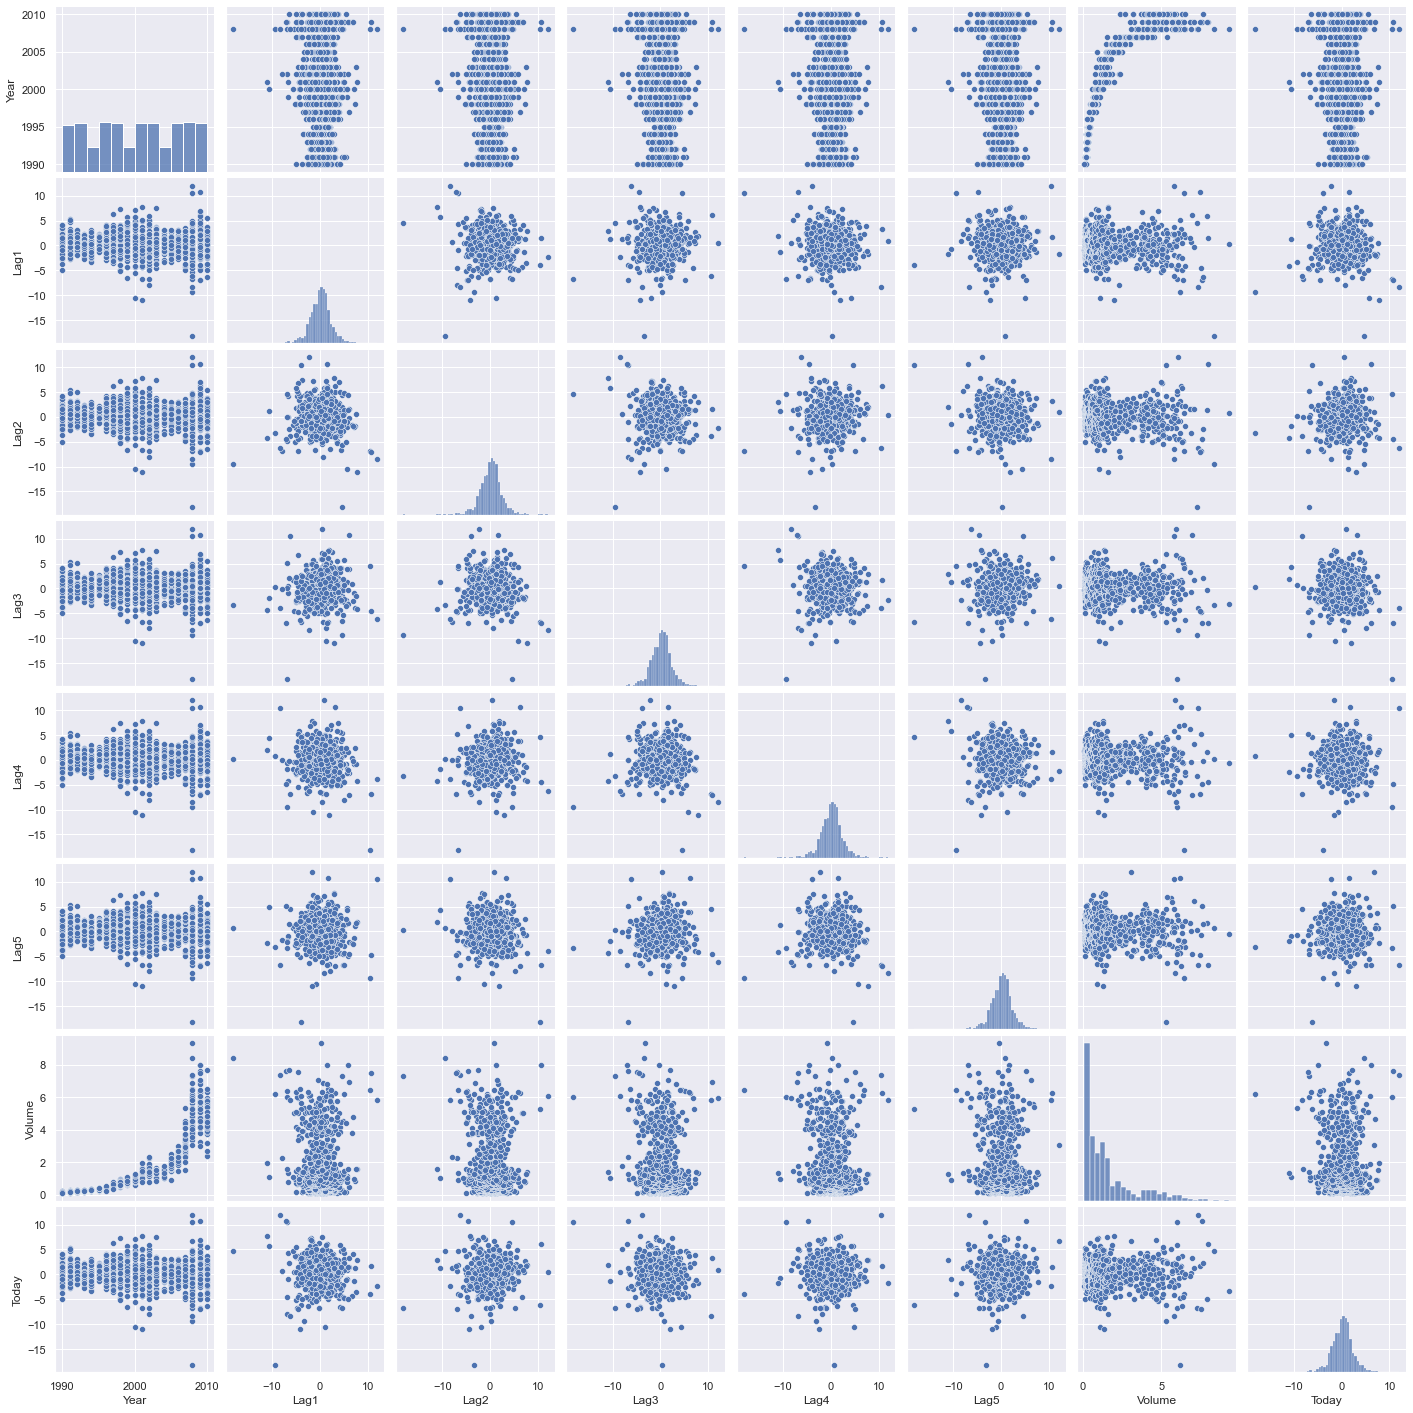

In [7]:
sns.pairplot(df)

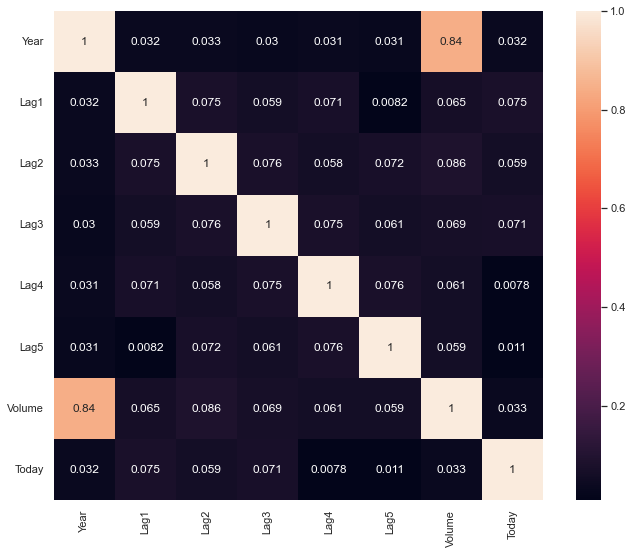

In [8]:
corr_matrix = df.corr().abs() 
fig, ax     = plt.subplots(figsize=(12, 9)) 
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True) 
plt.xticks(rotation=90) 
plt.yticks(rotation=0);

<AxesSubplot:>

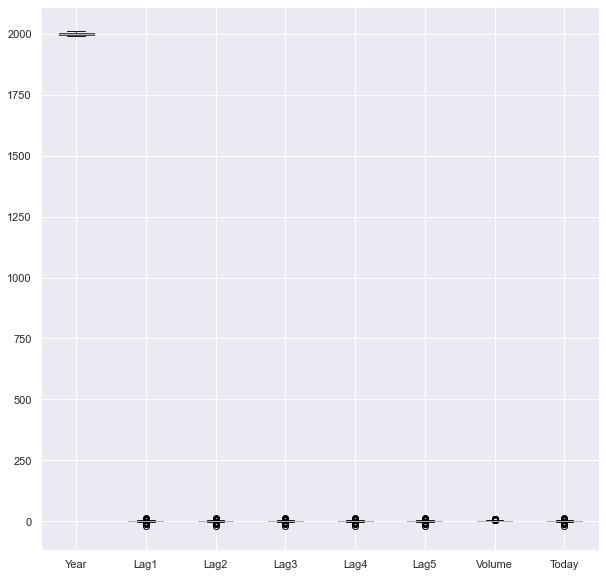

In [9]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(10,10))

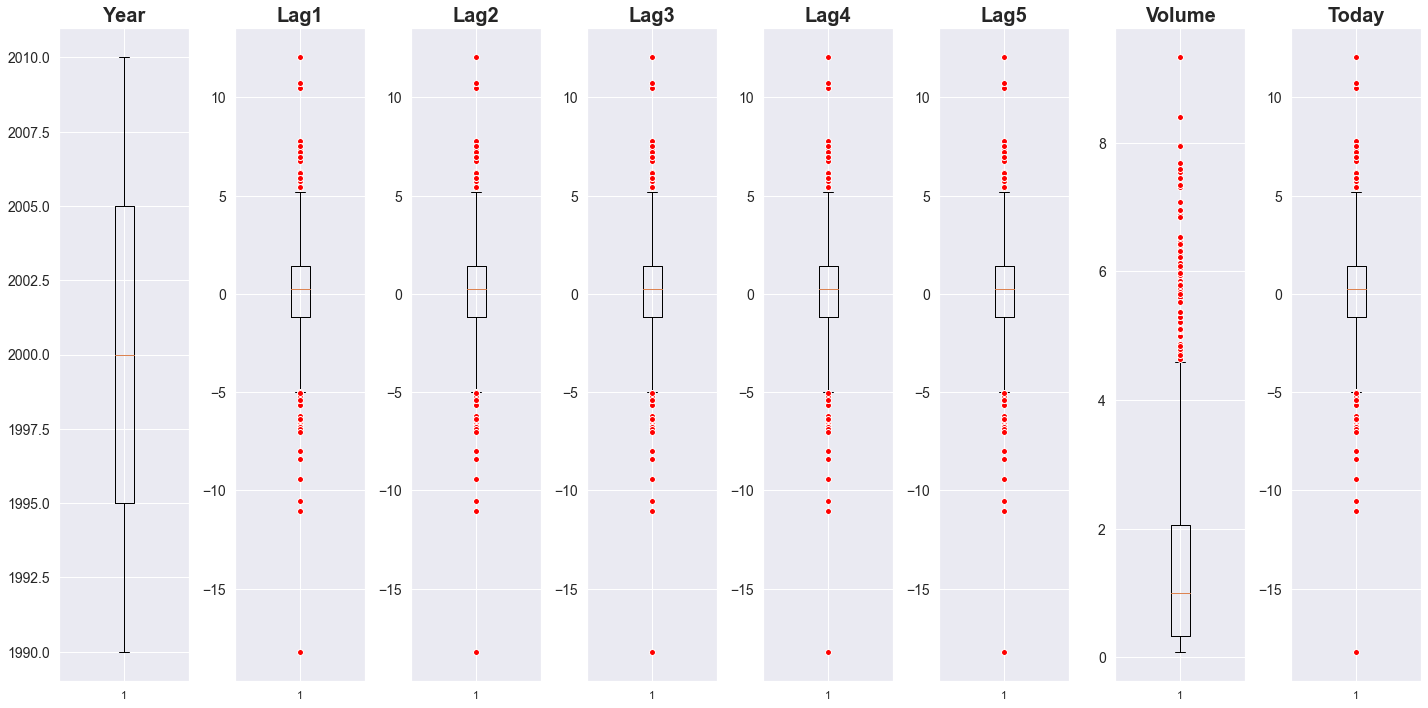

In [7]:
red_circle=dict(markerfacecolor='red',marker='o',markeredgecolor='white')
fig,axs=plt.subplots(1,len(df.columns)-1,figsize=(20,10))

for i,ax in enumerate (axs.flat):
    ax.boxplot(df.iloc[:,i],flierprops=red_circle)
    ax.set_title(df.columns[i],fontsize=20,fontweight='bold')
    ax.tick_params(axis='y',labelsize=14)
    
plt.tight_layout()

# 2. Perform a Support Vector Machine and use the summary function to show the results. Describe which variables are statistically significant. Divide data in proportion 80/20 (Train/Test). Also, use 5-fold and 10-fold cross validation.


In [41]:
X=df.drop(['Direction'],axis=1)
y=df.Direction.map(dict(Up=1,Down=0))
y

0       0
1       0
2       1
3       1
4       1
       ..
1084    1
1085    1
1086    1
1087    1
1088    1
Name: Direction, Length: 1089, dtype: int64

In [11]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = svm.SVC(kernel='linear', gamma=1, C=1, random_state=0, probability=True).fit(X_train, y_train)
model

SVC(C=1, gamma=1, kernel='linear', probability=True, random_state=0)

there is no package that provides a summary of the SVM model in Python, and sklearn is used for predictive modeling/machine learning and the evaluation criteria are based on performance on previously unseen data.

In [13]:
pred=model.predict(X_test)
pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.9954128440366973


Down here, 5-fold cross Validation

In [15]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores


array([0.98623853, 1.        , 0.98165138, 0.99082569, 1.        ])

In [16]:
print('Accuracy: %.3f (%.4f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.992 (0.0073)


Down here, 10-fold cross Validation

In [17]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores_10 = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_10

array([0.99082569, 1.        , 0.99082569, 1.        , 0.98165138,
       1.        , 1.        , 0.98165138, 1.        , 0.99074074])

In [18]:
print('Accuracy: %.3f (%.4f)' % (np.mean(scores_10), np.std(scores_10)))

Accuracy: 0.994 (0.0072)


# 3. Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression

Confusion matrix for our SVM 


In [19]:
confusion_matrix(y_test, pred)

array([[ 97,   0],
       [  1, 120]], dtype=int64)

I don't get that where is from logistic regression, but in SVM we have almost 100% successful prediction except one misprediction in area FN (False Positive)

# 4. Repeat the step 2-3 with Standard Decision Tree, Random Forest, XGboost.


## Decision tree 

In [20]:
X=df.drop(['Direction'],axis=1)
y=df.Direction.map(dict(Up=1,Down=0))
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=1)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [21]:
#another method of declaring of the Decision tree
from sklearn import tree
# Fit Sklearns tree classifier
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
print('training accuracy: {}'.format(np.around(clf.score(X_train, y_train), 3)))
print('leaf nodes: 6')

training accuracy: 1.0
leaf nodes: 6


In [22]:
y_pred= classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [23]:
cm= confusion_matrix(y_test, y_pred)
print(cm)


[[ 84   0]
 [  0 134]]


## Random Forest

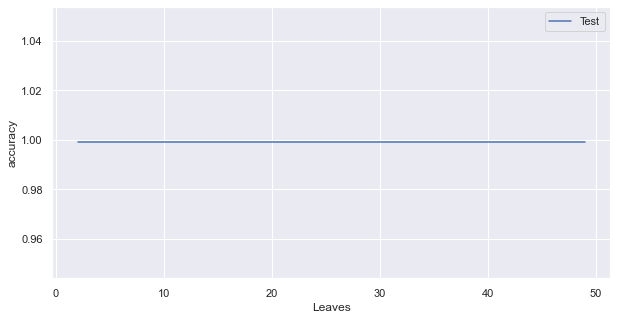

,Test
Leaves,
2.0,0.998851
3.0,0.998851
4.0,0.998851
5.0,0.998851
6.0,0.998851
7.0,0.998851
8.0,0.998851
9.0,0.998851
10.0,0.998851


In [24]:
from IPython.display import display, HTML
cv_folds = 10

results = []
for mln in np.arange(2, 50):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=mln)
    score = cross_val_score(clf, X_train, y_train, cv=cv_folds)
    results += [[mln, np.mean(score)]]


plt.figure(figsize=(10,5))
plot_df = pd.DataFrame(np.asarray(results), columns=['Leaves', 'Test']).set_index('Leaves')
sns.lineplot(data=plot_df);
plt.ylabel('accuracy')
plt.show();

display(HTML('<h4>Optimal tree size:</h4>'))
display(plot_df[plot_df['Test'] == plot_df['Test'].max()])

In [25]:
X=df.drop(['Direction'],axis=1)
y=df.Direction.map(dict(Up=1,Down=0))
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [26]:
pred_rand=clf.predict(X_test)
cm= confusion_matrix(y_test, pred_rand)
print(cm)


[[ 89   0]
 [  0 129]]


## XGBoost

In [107]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

X=df.drop(['Direction'],axis=1)
y=df.Direction.map(dict(Up=1,Down=0))
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [108]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [109]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
                          learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [111]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
preds

[13:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


array([0.43675822, 0.41583008, 0.42585284, 0.4047422 , 0.4126465 ,
       0.6052859 , 0.41433904, 0.42692673, 0.6091448 , 0.4165189 ,
       0.58857995, 0.5875985 , 0.4297501 , 0.5960789 , 0.5951967 ,
       0.5968147 , 0.6002791 , 0.6134226 , 0.5968147 , 0.42585284,
       0.4191529 , 0.59241235, 0.6163934 , 0.44657886, 0.62193626,
       0.60360193, 0.4214505 , 0.43004742, 0.42091444, 0.60491455,
       0.43986806, 0.5968079 , 0.6267501 , 0.4191529 , 0.406816  ,
       0.5960789 , 0.5968079 , 0.5968147 , 0.43986806, 0.5919356 ,
       0.5978313 , 0.42260253, 0.4248461 , 0.40897995, 0.6091448 ,
       0.59187627, 0.45085666, 0.42794338, 0.5999354 , 0.4165189 ,
       0.6102187 , 0.43568432, 0.5993993 , 0.60384065, 0.6044813 ,
       0.62193626, 0.41590765, 0.42431006, 0.42431006, 0.6006368 ,
       0.6104574 , 0.42415968, 0.6267501 , 0.42585284, 0.6091448 ,
       0.62013334, 0.6121048 , 0.5918011 , 0.5875985 , 0.41861683,
       0.45085666, 0.60433096, 0.41663665, 0.6056436 , 0.61342

In [112]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.408323


In [113]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[13:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.499249,0.000254,0.499734,0.000191
1,0.483220,0.022081,0.483895,0.021807
2,0.482446,0.022274,0.483805,0.021701
3,0.467937,0.041863,0.469599,0.041304
4,0.467096,0.042190,0.469352,0.041242


In [36]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.166579
Name: test-rmse-mean, dtype: float64


In [37]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[01:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


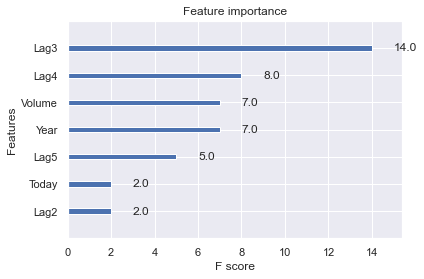

In [38]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# Repeat the step 2-3 with Neural Network.

In [252]:
from sklearn import preprocessing
X=df.drop(['Direction'],axis=1)
X = np.array(x)

Y=df.Direction.map(dict(Up=1,Down=0))
Y = np.array(Y).reshape(-1, 1)
Y[:5]


array([[0],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

In [254]:
def NeuralNetwork(X_train, Y_train, X_val=None, Y_val=None, epochs=10, nodes=[], lr=0.15):
    hidden_layers = len(nodes) - 1
    weights = InitializeWeights(nodes)

    for epoch in range(1, epochs+1):
        weights = Train(X_train, Y_train, lr, weights)

        if(epoch % 20 == 0):
            print("Epoch {}".format(epoch))
            print("Training Accuracy:{}".format(Accuracy(X_train, Y_train, weights)))
            if X_val.any():
                print("Validation Accuracy:{}".format(Accuracy(X_val, Y_val, weights)))
            
    return weights

In [255]:
def InitializeWeights(nodes):
    """Initialize weights with random values in [-1, 1] (including bias)"""
    layers, weights = len(nodes), []
    
    for i in range(1, layers):
        w = [[np.random.uniform(-1, 1) for k in range(nodes[i-1] + 1)]
              for j in range(nodes[i])]
        weights.append(np.matrix(w))
    
    return weights

In [256]:
def ForwardPropagation(x, weights, layers):
    activations, layer_input = [x], x
    for j in range(layers):
        activation = Sigmoid(np.dot(layer_input, weights[j].T))
        activations.append(activation)
        layer_input = np.append(1, activation) # Augment with bias
    
    return activations

In [257]:
def BackPropagation(y, activations, weights, layers):
    outputFinal = activations[-1]
    error = np.matrix(y - outputFinal) # Error at output
    
    for j in range(layers, 0, -1):
        currActivation = activations[j]
        
        if(j > 1):
            # Augment previous activation
            prevActivation = np.append(1, activations[j-1])
        else:
            # First hidden layer, prevActivation is input (without bias)
            prevActivation = activations[0]
        
        delta = np.multiply(error, SigmoidDerivative(currActivation))
        weights[j-1] += lr * np.multiply(delta.T, prevActivation)

        w = np.delete(weights[j-1], [0], axis=1) # Remove bias from weights
        error = np.dot(delta, w) # Calculate error for current layer
    
    return weights

In [258]:
def Train(X, Y, lr, weights):
    layers = len(weights)
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x)) # Augment feature vector
        
        activations = ForwardPropagation(x, weights, layers)
        weights = BackPropagation(y, activations, weights, layers)

    return weights


In [259]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def SigmoidDerivative(x):
    return np.multiply(x, 1-x)

In [260]:
def Predict(item, weights):
    layers = len(weights)
    item = np.append(1, item) # Augment feature vector
    
    ##_Forward Propagation_##
    activations = ForwardPropagation(item, weights, layers)
    
    outputFinal = activations[-1].A1
    index = FindMaxActivation(outputFinal)

    # Initialize prediction vector to zeros
    y = [0 for i in range(len(outputFinal))]
    y[index] = 1  # Set guessed class to 1

    return y # Return prediction vector


def FindMaxActivation(output):
    """Find max activation in output"""
    m, index = output[0], 0
    for i in range(1, len(output)):
        if(output[i] > m):
            m, index = output[i], i
    
    return index

def Accuracy(X, Y, weights):
    """Run set through network, find overall accuracy"""
    correct = 0

    for i in range(len(X)):
        x, y = X[i], list(Y[i])
        guess = Predict(x, weights)

        if(y == guess):
            # Guessed correctly
            correct += 1

    return correct / len(X)

In [261]:
f = len(X[0]) # Number of features
o = len(Y[0]) # Number of outputs / classes

layers = [f, 5, 10, o] # Number of nodes in layers
lr, epochs = 0.15, 100

weights = NeuralNetwork(X_train, Y_train, X_val, Y_val, epochs=epochs, nodes=layers, lr=lr);

Epoch 20
Training Accuracy:0.5528846153846154
Validation Accuracy:0.5483870967741935
Epoch 40
Training Accuracy:0.5528846153846154
Validation Accuracy:0.5483870967741935
Epoch 60
Training Accuracy:0.5528846153846154
Validation Accuracy:0.5483870967741935
Epoch 80
Training Accuracy:0.5528846153846154
Validation Accuracy:0.5483870967741935
Epoch 100
Training Accuracy:0.5528846153846154
Validation Accuracy:0.5483870967741935


In [262]:
print("Testing Accuracy: {}".format(Accuracy(X_test, Y_test, weights)))


Testing Accuracy: 0.573170731707317


In [270]:
weights

[matrix([[-4.29480969e+00,  1.01310866e-02,  3.34725810e-01,
           3.51272574e-02, -9.00244621e-01, -5.48910351e-01,
           5.12791010e-01,  8.51913370e-02,  8.80192383e+00],
         [-5.62010510e+00, -1.12706577e-01,  1.19798245e-01,
           1.92205457e-01,  1.72046862e-01,  1.06617289e-01,
           4.30318573e-01,  1.36272317e-01,  9.44918389e+00],
         [ 2.12136482e+00,  1.84959939e-01,  1.96740702e-01,
           6.34986710e-01, -7.53157494e-02,  4.02421837e-01,
           1.08380845e+00, -3.19312107e-01,  9.80683651e-01],
         [ 8.50138725e-01,  9.14761538e-01, -1.18908865e-01,
          -3.12816291e-01, -7.95202818e-01,  1.06792576e+00,
          -7.52949206e-02,  8.46939693e-01,  2.41398855e+00],
         [-7.92572812e+00,  4.25367796e-02, -2.86725805e-01,
           5.96657781e-01, -2.73941673e-02, -1.18509697e-01,
          -8.82256530e-01, -1.08908206e-01,  1.48191155e+01]]),
 matrix([[-1.97740474,  1.35676036,  1.91185604, -0.05076505,  0.41606522,
   

# Compare the results of SVM, Standard Decision Tree, Random Forest and XGboost. Describe and comment the comparison.

**Random Forest is intrinsically suited for multiclass problems, while SVM is intrinsically two-class. For multiclass problem you will need to reduce it into multiple binary classification problems.**

Random Forest works well with a mixture of numerical and categorical features. When features are on the various scales, it is also fine. Roughly speaking, with Random Forest you can use data as they are. SVM maximizes the "margin" and thus relies on the concept of "distance" between different points. It is up to you to decide if "distance" is meaningful. As a consequence, one-hot encoding for categorical features is a must-do. Further, min-max or other scaling is highly recommended at preprocessing step.

If you have data with n points and m features, an intermediate step in SVM is constructing an n×n matrix (think about memory requirements for storage) by calculating n2 dot products (computational complexity). Therefore, as a rule of thumb, SVM is hardly scalable beyond 10^5 points. Large number of features (homogeneous features with meaningful distance, pixel of image would be a perfect example) is generally not a problem.

**For a classification problem Random Forest gives you probability of belonging to class. SVM gives you distance to the boundary, you still need to convert it to probability somehow if you need probability.**

For those problems, where SVM applies, it generally performs better than Random Forest.

SVM gives you "support vectors", that is points in each class closest to the boundary between classes. They may be of interest by themselves for interpretation.

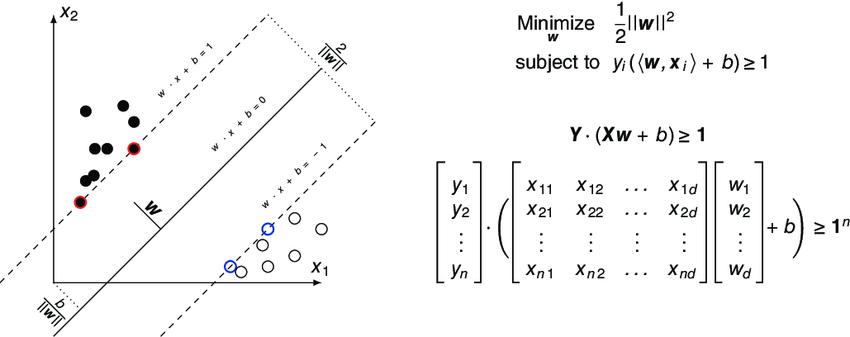

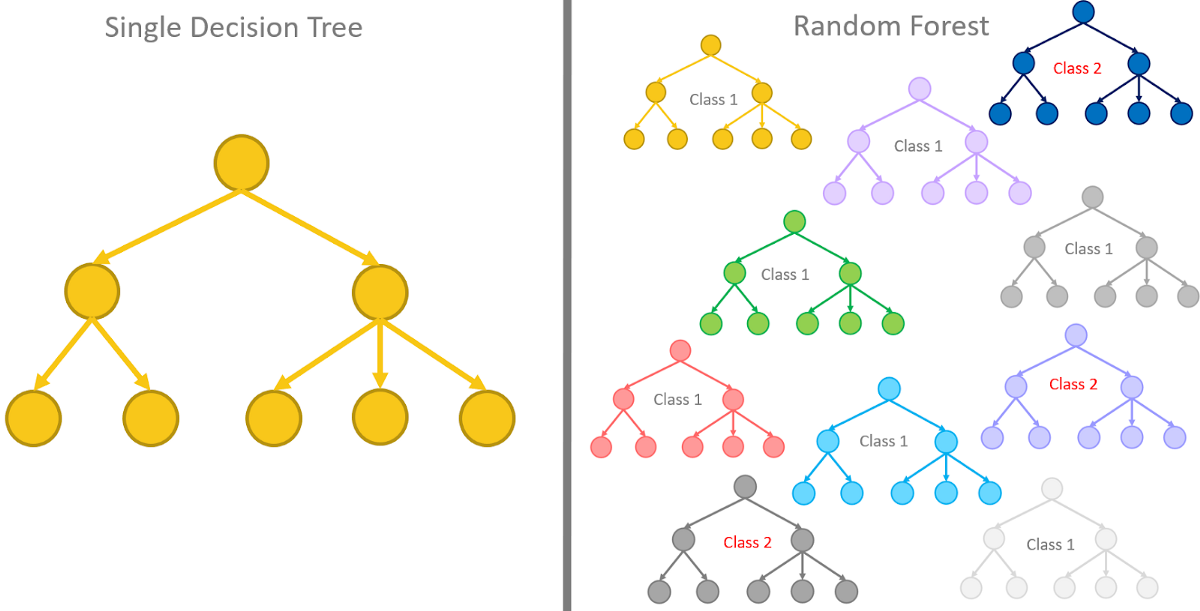



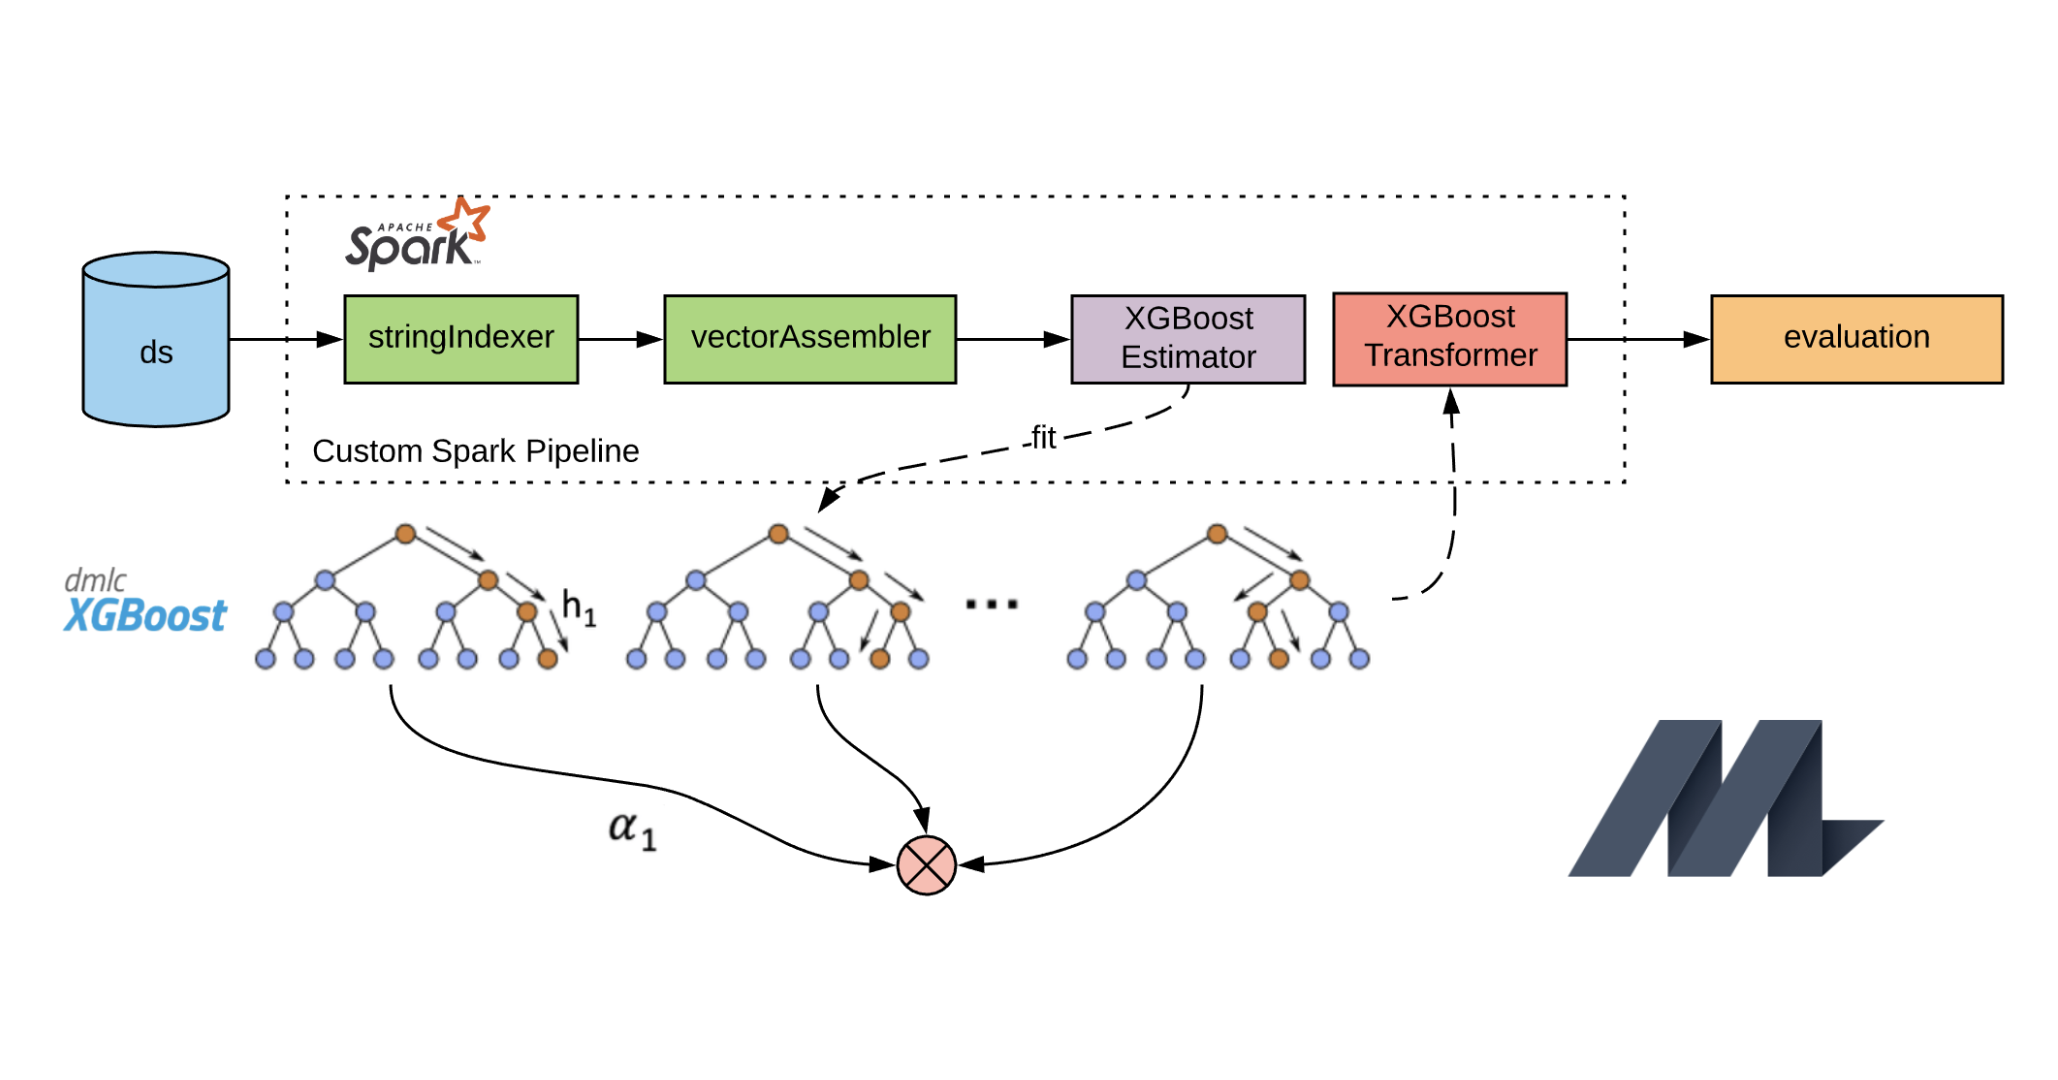